In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,Math

# Introduction to random numbers

In [7]:
# use the numpy module
np.random.rand(1)

array([0.92515419])

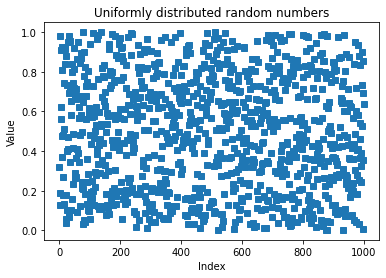

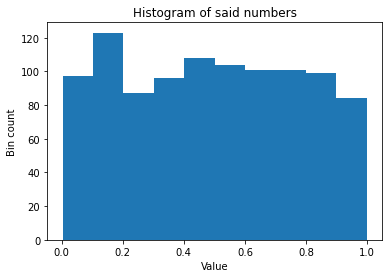

In [3]:
# make a plot of these numbers
nums = np.random.rand(1000)

plt.plot(nums,'s')
plt.title('Uniformly distributed random numbers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

plt.hist(nums)
plt.title('Histogram of said numbers')
plt.xlabel('Value')
plt.ylabel('Bin count')
plt.show()

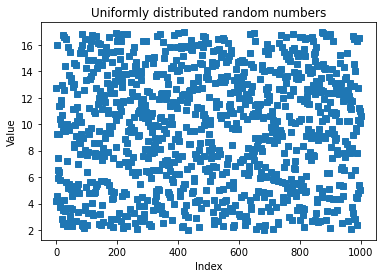

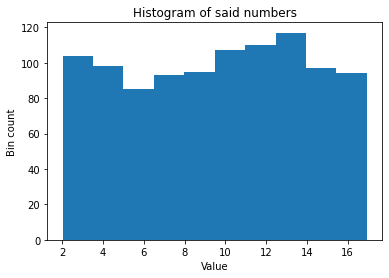

In [4]:
# generating random numbers in a specific range

# parameters
minval = 2
maxval = 17

# random numbers in range [0 1]
randangs = np.random.rand(1000)

# modulate those numbers to parameters
randangs = randangs*(maxval-minval) + minval


plt.plot(randangs,'s')
plt.title('Uniformly distributed random numbers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

plt.hist(randangs)
plt.title('Histogram of said numbers')
plt.xlabel('Value')
plt.ylabel('Bin count')
plt.show()

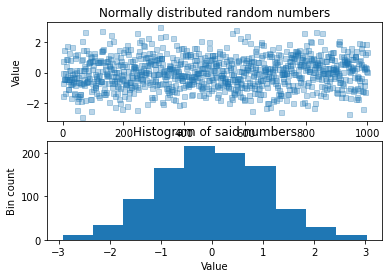

In [5]:
# normally distributed random numbers
nums = np.random.randn(1000)

plt.subplot(211)
plt.plot(nums,'s',markersize=5,alpha=.3)
plt.title('Normally distributed random numbers')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(212)
plt.hist(nums)
plt.title('Histogram of said numbers')
plt.xlabel('Value')
plt.ylabel('Bin count')
plt.show()

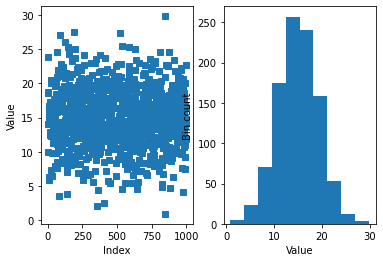

This distribution has a mean of 15.0398 and a standard deviation of 4.26331


In [6]:
# generate normally distributed random numbers with a mean of 15 and a standard deviation of 4.3
desired_mean = 15
desired_std = 4.3

nums = desired_mean + desired_std*np.random.randn(1000)

plt.subplot(121)
plt.plot(nums,'s')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(122)
plt.hist(nums)
plt.xlabel('Value')
plt.ylabel('Bin count')
plt.show()

print('This distribution has a mean of %g and a standard deviation of %g' %(np.mean(nums),np.std(nums)))


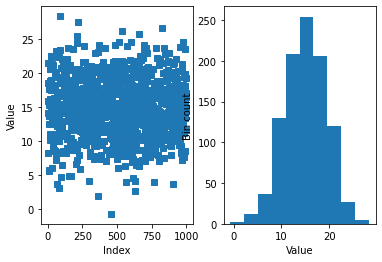

This distribution has a mean of 15 and a standard deviation of 4.3


In [14]:
# generate normal random numbers
nums = np.random.randn(1000)

# enforce mean of 0 and std of 1
nums = nums - np.mean(nums)
nums = nums/np.std(nums)

nums = nums*desired_std + desired_mean

plt.subplot(121)
plt.plot(nums,'s')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(122)
plt.hist(nums)
plt.xlabel('Value')
plt.ylabel('Bin count')
plt.show()

print('This distribution has a mean of %g and a standard deviation of %g' %(np.mean(nums),np.std(nums)))

# Plotting random phase angles

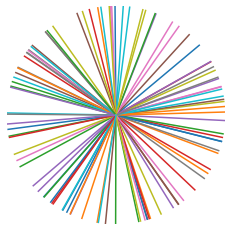

In [21]:
angs = np.random.rand(100)*2*np.pi

for i in angs:
    plt.plot([0,np.cos(i)],[0,np.sin(i)])

plt.axis('square')
plt.axis([-1,1,-1,1])
plt.axis('off')
plt.show()

# Converting between radians and degrees

In [24]:
# the "manual" method, part 1

# specify in degrees
deg = 240

# print the conversion 
print( "%g degrees is %g radians." %(deg,deg*np.pi/180) )

240 degrees is 4.18879 radians.


In [25]:
# the "manual" method, part 2

# specify in radians
rad = np.pi

# print the conversion (note that the algorithm is implemented in-line!)
print( "%g radians is %g degrees." %(rad,180*rad/np.pi) )

3.14159 radians is 180 degrees.


In [26]:
# but the above implementations are not completely satisfactory, because angles are circular (e.g., 2pi = 0)

rad = np.pi*3

deg = (180*rad/np.pi)%360

print( "%g radians is %g degrees." %(rad,deg) )

9.42478 radians is 180 degrees.


In [28]:
# or use a Python function

deg = 180*3
np.deg2rad(deg)

9.42477796076938

In [29]:
# some silliness with embedding functions inside functions

np.rad2deg( np.deg2rad(180) )

180.0

In [30]:
# a function that asks for a number and unit, then converts and makes a plot
def angle_convert_plot():
    
    # input from user
    angle = eval(input('What angle to convert? ') )
    unit  = input('Which unit did you input (radian or degree)? ')
    
    # do the conversion
    if unit[0].lower()=='r':
        rad = angle
        deg = np.rad2deg(angle)
    elif unit[0].lower()=='d':
        deg = angle
        rad = np.deg2rad(angle)
    else:
        raise ValueError('Unknown unit!')
    
    # convert to <360
    deg = deg%360
    rad = rad%(2*np.pi)
    
    # make the graph
    plt.plot([0,np.cos(rad)],[0,np.sin(rad)],'r',linewidth=3)
    plt.plot([0,1],[0,0],'r',linewidth=3)
    plt.axis('square')
    plt.axis([-1,1,-1,1])
    plt.grid()
    plt.title('Angle of %g$^o$, or %g rad.' %(deg,rad))
    
    plt.show()

What angle to convert? 240
Which unit did you input (radian or degree)? degree


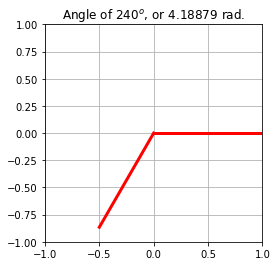

In [31]:
angle_convert_plot()

# The Pythagorean theorem

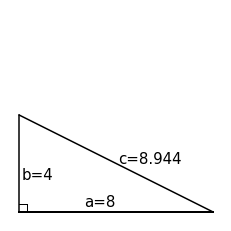

In [32]:
a = 8
b = 4

# compute c
c = np.sqrt(a**2 + b**2)

# draw the triangle
plt.plot([0,a],[0,0],'k',linewidth=2)
plt.plot([0,0],[0,b],'k')
plt.plot([0,a],[b,0],'k')

# plot right-angle
plt.plot([.3,.3],[0,.3],'k',linewidth=1)
plt.plot([0,.3],[.3,.3],'k',linewidth=1)

plt.text(a/3,.25,'a='+str(a),fontsize=15)
plt.text(.1,b/3,'b='+str(b),fontsize=15)
plt.text(a/2+.1,b/2,'c='+str(np.round(c,3)),fontsize=15)

axlim = np.max((a,b))+.5
plt.axis('square')
plt.axis([-.5,axlim,-.5,axlim])
plt.axis('off')
plt.show()

In [33]:
# compute magnitude and angle of complex number

z = np.complex(3,4)

mag1 = np.sqrt( np.real(z)**2 + np.imag(z)**2 )
mag2 = np.abs(z)
print(mag1,mag2)

5.0 5.0


In [34]:
ang1 = np.arctan2(np.imag(z),np.real(z))
ang2 = np.angle(z)

print(ang1,ang2)

0.9272952180016122 0.9272952180016122


# Graphing resolution for sine, cosine, and tangent

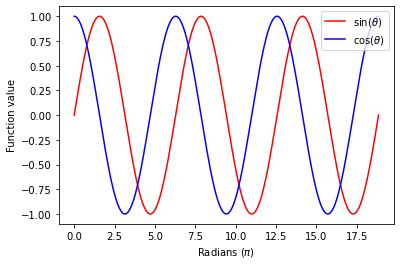

In [35]:
# specify the radians ("time")

x = np.linspace(0,6*np.pi,400)

plt.plot(x,np.sin(x),'r',label='$\sin(\\theta)$')
plt.plot(x,np.cos(x),'b',label='$\cos(\\theta)$')
plt.legend()
plt.xlabel('Radians ($\pi$)')
plt.ylabel('Function value')
plt.show()

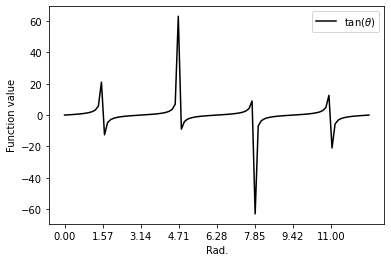

In [41]:
# plot tangent

x = np.linspace(0,4*np.pi,100)

plt.plot(x,np.tan(x),'k',label='$\\tan(\\theta)$')
plt.legend()
plt.xlabel('Rad.')
plt.xticks(np.arange(x[0],x[-1],np.pi/2))
plt.ylabel('Function value')
plt.show()

In [42]:
# illustrate that tan = sin/cos

ang = np.random.rand(1)[0]*2*np.pi

tan = np.tan(ang)
sc  = np.sin(ang) / np.cos(ang)

print( sc - tan )

0.0


In [43]:
# famous equality in trigonometry

ang = np.linspace(0,2*np.pi,10)

np.cos(ang)**2 + np.sin(ang)**2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

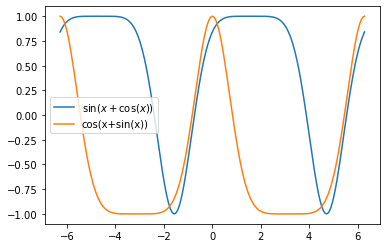

In [44]:
x = np.linspace(-2*np.pi,2*np.pi,200)

y1 = np.sin(x + np.cos(x))
y2 = np.cos(x + np.sin(x))

plt.plot(x,y1,x,y2)
plt.legend(['$\sin(x+\cos(x))$','cos(x+sin(x))'])
plt.show()

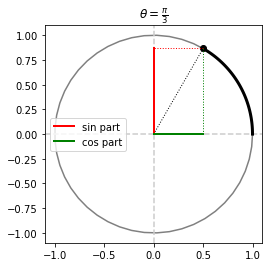

In [47]:
th = sym.pi*2/6
theta = float(th)

x = np.linspace(0,theta%(2*np.pi),100)

# plot unit circle
plt.plot(np.cos(np.linspace(0,2*np.pi)),np.sin(np.linspace(0,2*np.pi)),color='gray')
plt.plot([-1.1,1.1],[0,0],'--',color=[.8,.8,.8])
plt.plot([0,0],[-1.1,1.1],'--',color=[.8,.8,.8])

# plot arc
plt.plot(np.cos(x),np.sin(x),'k',linewidth=3)

# plot vector to point
plt.plot([0,np.cos(theta)],[0,np.sin(theta)],'k:',linewidth=1)
plt.plot(np.cos(theta),np.sin(theta),'ko')

# plot cosine part
plt.plot([0,0],[0,np.sin(theta)],'r',linewidth=2,label='sin part')
plt.plot([np.cos(theta),0],[np.sin(theta),np.sin(theta)],'r:',linewidth=1)
plt.plot([np.cos(theta),0],[0,0],'g',linewidth=2,label='cos part')
plt.plot([np.cos(theta),np.cos(theta)],[0,np.sin(theta)],'g:',linewidth=1)

plt.title('$\\theta=%s$' %sym.latex(th))
plt.axis([-1.1,1.1,-1.1,1.1])
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

# Euler's formula

In [48]:
# Euler's formula: me^ik = cos(k)+isin(k)

# create euler's number
k = np.pi/4
m = 2.3

cis = m*(np.cos(k) + 1j*np.sin(k))
eul = m*np.exp(1j*k)

print(cis)
print(eul)

(1.6263455967290592+1.6263455967290592j)
(1.6263455967290592+1.6263455967290592j)


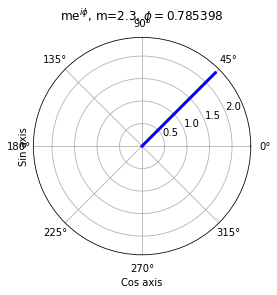

In [49]:
# now extract magnitude and phase
mag = np.abs(eul)
ang = np.angle(eul)

# then plot
plt.polar([0,ang],[0,mag],'b',linewidth=3)
# plt.plot(k,m,'ro')

plt.xlabel('Cos axis'), plt.ylabel('Sin axis')
plt.title('me$^{i\phi}$, m=%g, $\phi=$%g' %(mag,ang))
plt.show()

In [50]:
# function that will input a cosine/sine pair and output euler's formula with aa graph

def eulerFromCosSin():
    
    re = eval( input('cosine part: ') )
    im = eval( input('sine part: ') )
    
    m = np.round( np.sqrt(re**2 + im**2) ,2)
    k = np.round( np.arctan2(im,re) ,2)
    
    plt.polar([0,k],[0,m],'b',linewidth=3)
    plt.title('me$^{i\phi}$, m=%g, $\phi=$%g' %(m,np.round(k,2)))
    plt.thetagrids([0,45,130,215,250])
    plt.show()
    

cosine part: 200
sine part: 320


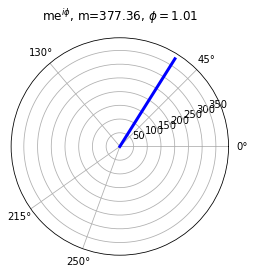

In [52]:
eulerFromCosSin()

# Exploding Euler

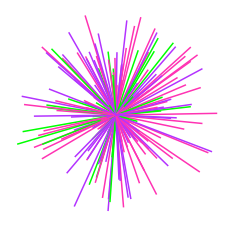

In [53]:
nvects = 200
ms = np.random.rand(nvects)
ps = np.random.rand(nvects)*2*np.pi

for i in range(0,nvects):
    
    randnum = np.random.rand()
    
    if randnum<.4:
        color = [1,.2,.7]
    elif randnum>.4 and randnum<.8:
        color = [.7,.2,1]
    else:
        color = [0,1,0]
        
    plt.polar([0,ps[i]],[0,ms[i]],color=color)
        
        
plt.axis('off')
plt.show()

# Snakes with trigonometry!

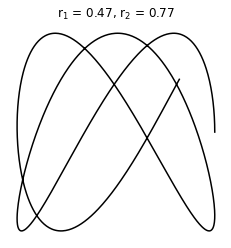

In [61]:
angs = np.linspace(0,8*np.pi,1000)

cs = np.random.rand()
ss = np.random.rand()

x = np.cos(cs*angs)
y = np.sin(ss*angs)

# x = np.append(x,x[0])
# y = np.append(y,y[0])

plt.plot(x,y,'k')
plt.axis('square')
plt.axis([-1.1,1.1,-1.1,1.1])
plt.title('r$_1$ = %s, r$_2$ = %s' %(np.round(cs,2),np.round(ss,2)))
plt.axis('off')
plt.show()

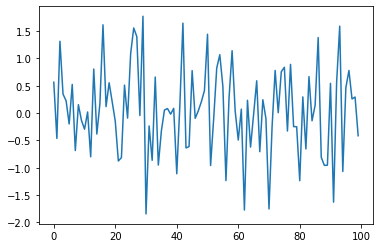

In [62]:
# plot a series of random numbers
s = np.random.randn(100,1)
plt.plot(s)
plt.show()

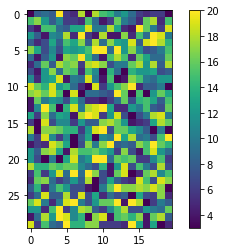

20


In [63]:
# create and image a matrix of random integers between (and including) 3 and 20

mat = np.random.randint(3,21,(30,20))

plt.imshow(mat)
plt.colorbar()
plt.show()
print(np.max(mat))

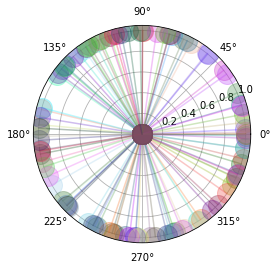

In [64]:
# create 100 random phase angles [0,2pi] and show unit vectors with those angles

n = 100

randphases = np.random.rand(n)*2*np.pi

for i in range(0,n):
    plt.polar([0,randphases[i]],[0,1],'o-',color=np.random.rand(3),markersize=20,alpha=.3)
    
plt.show()

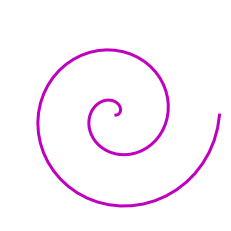

In [65]:
# create an outwards spiral using phase angles and amplitudes

n = 100
a = np.linspace(0,1,n)
p = np.linspace(0,4*np.pi,n)

plt.polar(p,a,'m',linewidth=3)
plt.axis('off')
plt.show()